<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 527 Homework 3

## Group Members: Beck Addison, Shivam Kaul, Gin Wang

### Problem 0 (3 points)

## Part 1: Line Search 

### Problem 1.1 (Exam Style)

$$
\nabla f(x,y)
= 
\begin{bmatrix} 
\frac{\delta f}{\delta x} \\
\frac{\delta f}{\delta y}
\end{bmatrix}
=
\begin{bmatrix}
 ax \\ 
 by 
\end{bmatrix} 
$$ 

### Problem 1.2 (Exam Style)

$$h(\alpha) = f(x_0-\alpha ax, y_0 - \alpha b y) = \frac{1}{2} (a(x_0-\alpha ax_0)^2 + b(y_0-\alpha by_0)^2)$$

### Problem 1.3 (Exam Style)

There are two strategies to answer this problem:

##### Strategy 1: Derivation and optimization

We can find the derivative of the function $h(\alpha)$ in $\alpha$ to determine where any extrema are. Since this function is parabolic, we can conclude that the only extremum will be the global minimum - our desired point.

$$
h(\alpha) = \frac{1}{2}(a(x_0 - \alpha a x_0)^2 + b(y_0 - \alpha b y_0)^2) \\
h(\alpha) = \frac{1}{2}(a((\alpha a x_0)^2 - 2 \alpha a x_0^2 + x_0^2) + b((\alpha b y_0)^2 - 2 \alpha b y_0^2 + y_0^2))
$$
---
$$
h'(\alpha) = \frac{1}{2}((2\alpha a^3 x_0^2 - 2 a x_0^2) + b(2\alpha b^3 y_0^2 - 2 b y_0^2))
$$
---
$$
0 = \frac{1}{2}((2\alpha a^3 x_0^2 - 2 a^2 x_0^2) + (2\alpha b^3 y_0^2 - 2 b^2 y_0^2)) \\
0 = \alpha a^3 x_0^2 - a^2 x_0^2 + \alpha b^3 y_0^2 - b^2 y_0^2 \\
a^2 x_0^2 + b^2 y_0^2 = \alpha a^3 x_0^2 + \alpha b^3 y_0^2 \\
\alpha = \frac{a^2 x_0^2 + b^2 y_0^2}{a^3 x_0^2 + b^3 y_0^2}
$$

##### Strategy 2: Axis of symmetry of a second-degree polynomial

By recognizing the form of $h(\alpha)$ as a second-degree polynomial (a parabola in $\alpha$), we can use the axis of symmetry to indicate the location of the minimum.

$$h(\alpha) = j\alpha^2 + k\alpha+l$$

$$\text{ArgMin of paraboloid at} \frac{-k}{2j}$$

$$j = a^3x_0^2 + b^3y_0^2$$

$$k = -2a^2x_0^2 + -2b^2y_0^2$$

$$\alpha = \frac{a^2x_0^2 + b^2y_0^2}{a^3x_0^2 + b^3y_0^2}$$

In either case, we get the same answer: $\alpha = \frac{a^2x_0^2 + b^2y_0^2}{a^3x_0^2 + b^3y_0^2}$. Here, the denominator is always nonzero because $x_0$ and $y_0$ cannot both be zero simultaneously, and $a>0$, $b>0$ (Given).

### Problem 1.4 (Exam Style)

$$\begin{bmatrix} x_1 \\ y_1 \end{bmatrix} = \begin{bmatrix} x_0 \\ y_0 \end{bmatrix} - \frac{a^2x_0^2 + b^2y_0^2}{a^3x_0^2 + b^3y_0^2}\begin{bmatrix} ax_0 \\ by_0 \end{bmatrix}$$

### Problem 1.5 (Exam Style)

When $a=b$, $\begin{bmatrix} x_1 \\ y_1 \end{bmatrix} = \begin{bmatrix} x_0 \\ y_0 \end{bmatrix}-\frac{1}{a}\begin{bmatrix} ax_0 \\ ay_0 \end{bmatrix}$

We have $\begin{bmatrix} x_1 \\ y_1 \end{bmatrix} = \begin{bmatrix} x_0 \\ y_0 \end{bmatrix}-\begin{bmatrix} x_0 \\ y_0 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$

When $a\neq b$, there are three subcases:

1. $x_0 \neq 0, y_0 \neq 0$

    Since $a>0$ and $b>0$, the only way for the ideal version of line search to find the minimum is for $a=b$, which yields a contradiction. This case cannot be true.


2. $x_0 = 0, y_0 \neq 0$
    
   We have $\begin{bmatrix} x_1 \\ y_1 \end{bmatrix} = \begin{bmatrix} 0 \\ y_0 \end{bmatrix} - \frac{b^2}{b^3} \begin{bmatrix} 0 \\ by_0 \end{bmatrix} = \begin{bmatrix} 0 \\ y_0 \end{bmatrix} - \begin{bmatrix} 0 \\ y_0 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$

3. $x_0 \neq 0, y_0 = 0$
  
   We have $\begin{bmatrix} x_1 \\ y_1 \end{bmatrix} = \begin{bmatrix} x_0 \\ 0 \end{bmatrix} - \frac{a^2}{a^3} \begin{bmatrix} ax_0 \\ 0 \end{bmatrix} = \begin{bmatrix} x_0 \\ 0 \end{bmatrix} - \begin{bmatrix} x_0 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$

## Part 2: Automatic Differentiation

In [66]:
import autograd.numpy as np
from autograd import grad, jacobian

In [67]:
from matplotlib import pyplot as plt
%matplotlib inline

In [68]:
def banana(z):
    return np.array(100 * (z[1] - z[0] ** 2) ** 2 + (1 - z[0]) ** 2)

### Problem 2.1

In [69]:
banana_gradient = grad(banana)
banana_hessian = jacobian(grad(banana))

In [70]:
z0 = np.linspace(-2., 2., 101)
z = np.vstack((z0, np.ones(z0.shape)))

In [71]:
banana_gradient_0 = []
banana_gradient_1 = []
for i in range(101):
  banana_gradient_0.append(banana_gradient(z[:,i])[0])
  banana_gradient_1.append(banana_gradient(z[:,i])[1])

In [72]:
banana_hessian_00 = []
banana_hessian_01 = []
banana_hessian_11 = []
for i in range(101):
  banana_hessian_00.append(banana_hessian(z[:,i])[0][0])
  banana_hessian_01.append(banana_hessian(z[:,i])[0][1])
  banana_hessian_11.append(banana_hessian(z[:,i])[1][1])

In [73]:
plt_data = {
    0 : {
        'x' : z0,
        'y' : [banana(z)],
        'label' : ['Banana'],
        'title' : 'Banana',
        'x_label' : 'z0',
        'y_label' : 'banana(z)'
    },
    1 : {
        'x' : z0,
        'y' : [banana_gradient_0, banana_gradient_1],
        'label' : ['Banana Gradient First Component', 'Banana Gradient Second Component'],
        'title' : 'Banana Gradient',
        'x_label' : 'z0',
        'y_label' : 'gradient(banana)'
    },
    2 : {
        'x' : z0,
        'y' : [banana_hessian_00, banana_hessian_01, banana_hessian_11],
        'label' : ['Banana Hessian H00', 'Banana Hessian H01', 'Banana Hessian H11'],
        'title' : 'Banana Hessian',
        'x_label' : 'z0',
        'y_label' : 'hessian(banana)'
    }
}

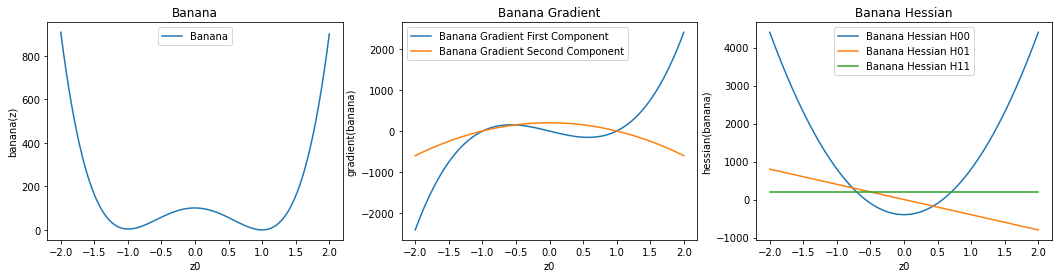

In [74]:
plt.figure(figsize=(18,4))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    x, y, label, title, x_label, y_label = plt_data[i].values()
    for j in range(len(y)):
        plt.plot(x, y[j], label = label[j])
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()

### Problem 2.2 (Exam style except for the function calls)

In [75]:
banana_gradient(np.array([[0],[0]]))

array([[-2],
       [ 0]])

In [76]:
banana_hessian(np.array([[0],[0]]))

array([[[[  2],
         [  0]]],


       [[[  0],
         [200]]]])

Here, we can see that the gradient at $f(0,0)$ is $\nabla f(0, 0) = \begin{bmatrix} -2 \\ 0 \end{bmatrix}$, and the Hessian is $H_f = \begin{bmatrix} 2 & 0 \\ 0 & 200 \end{bmatrix}$. 

The hessian has a positive determinant and positive first order leading principal minor - therefore, the point $(0,0)$ *is* a stationary point (in fact, it is a minimum on a convex point - this is evidenced by the positive Hessian for any value of $x$ or $y$). 

## Part 3: Gradient Descent

In [77]:
from scipy import optimize
from numpy import linalg as npl


def line_search(f, g, z0, f0, g0, state=None):
    outcome = optimize.line_search(f, g, z0, -g0, g0, f0)
    alpha, f1 = outcome[0], outcome[3]
    evaluations = outcome[1]
    if alpha is None:
        alpha, f1 = 0., f0
    z1 = z0 - g0 * alpha
    return z1, f1, evaluations, state

In [78]:
def gd(f, g, z0, step_function=line_search, state=None, max_evaluations=1000,
       min_step=1.e-8, min_gradient=1.e-6):
    evaluations, h = 0, []
    while True:
        f0, g0 = f(z0), g(z0)
        if not len(h):
            h.append((z0, f0))
        evaluations += 1
        if npl.norm(g0) < min_gradient:
            z1, f1 = z0, f0
            break
        z1, f1, n_eval, state = step_function(f, g, z0, f0, g0, state=state)
        evaluations += n_eval
        h.append((z1, f1))
        if npl.norm(z1 - z0) < min_step or evaluations > max_evaluations:
            break
        z0 = z1
    return z1, f1, evaluations, h

In [79]:
def momentum(f, g, z0, f0, g0, state=None):
    if state is None:
        state = {'alpha': 0.001, 'v0': 0., 'mu': 0.9}
    v1 = state['mu'] * state['v0'] - g0 * state['alpha']
    z1 = z0 + v1
    state['v0'] = v1
    return z1, f(z1), 1, state

### Problem 3.1

In [80]:
def fixed(f, g, z0, f0, g0, state=None):
    #fixed is a special case of momentum method where there is no initial velocity and no constant of acceleration (mu)
  if state is None:
    state = {'alpha': 0.001}
  z1 = z0 - g0*state['alpha']
  return z1, f(z1), 1, state

In [81]:
z_0 = np.array((-1.2, 1.))
z_star = np.array([1., 1.])

In [82]:
steps = (
    (line_search, None),
    (fixed, {'alpha': 0.001}),
    (fixed, {'alpha': 0.005}),
    (momentum, {'alpha': 0.001, 'v0': 0. , 'mu': 0.2}),
    (momentum, {'alpha': 0.001, 'v0': 0. , 'mu': 0.5}),
    (momentum, {'alpha': 0.001, 'v0': 0. , 'mu': 0.93})
    )

As can be seen above, we chose $\mu = 0.93$ for the final parameter set.

In [83]:
dataset = []

for step in steps:
    data = gd(
        banana,
        banana_gradient,
        z_0,
        step_function = step[0],
        state = step[1])
    dataset.append(data)

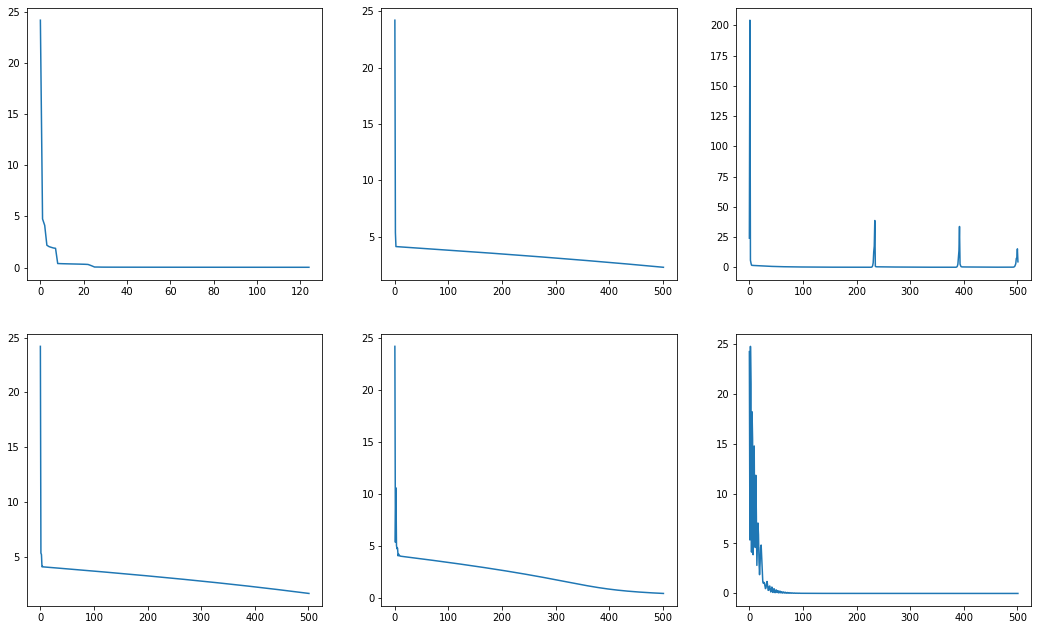

In [84]:
fig, axs = plt.subplots(2, 3, figsize = (18,11))
k = 0

for i in range(2):
    for j in range(3):
        z1, f1, evaluations, h = dataset[k]
        h_vals = []
        for m in range(len(h)):
            h_vals.append(h[m][1])
        axs[i, j].plot(
            np.arange(0, len(h)),
            h_vals
        )
        k += 1

In [85]:
from numpy import array2string


def plot_contours(f, z_ast, rect):
    assert len(z_ast) == 2, 'can only plot in two dimensions'
    n = 101
    xs = np.linspace(rect[0], rect[1], n)
    ys = np.linspace(rect[2], rect[3], n)
    fs = np.array([[f(np.array([x, y])) for x in xs] for y in ys])
    plt.contour(xs, ys, fs, 20, colors='grey', linewidths=1)
    plt.plot(z_ast[0], z_ast[1], 'ro')
    plt.axis('scaled')


def fa(a, p=2):
    return array2string(np.array(a), precision=p, separator=', ')

In [86]:
def plot_history_path(h, f, z_ast, n_evals, state, rect=(-2., 2., -2., 2.)):
    assert len(z_ast) == 2, 'can only plot in two dimensions'
    plot_contours(f, z_ast, rect)
    plt.plot([p[0][0] for p in h], [p[0][1] for p in h])
    plt.plot(h[0][0][0], h[0][0][1], 'bo')
    z_last, f_last = h[-1][0], h[-1][1]
    ft = 'f({}) = {:.2g}; {} steps; {} evals'
    title = ft.format(fa(z_last), f_last, len(h), n_evals)
    if state is not None:
        s = state.copy()
        try:
            del s['v0']
        except KeyError:
            pass
        st = '; '.join(['{}={:.3g}'.format(name, value) for name, value in s.items()])
        title = '\n'.join((title, st))
    plt.title(title)

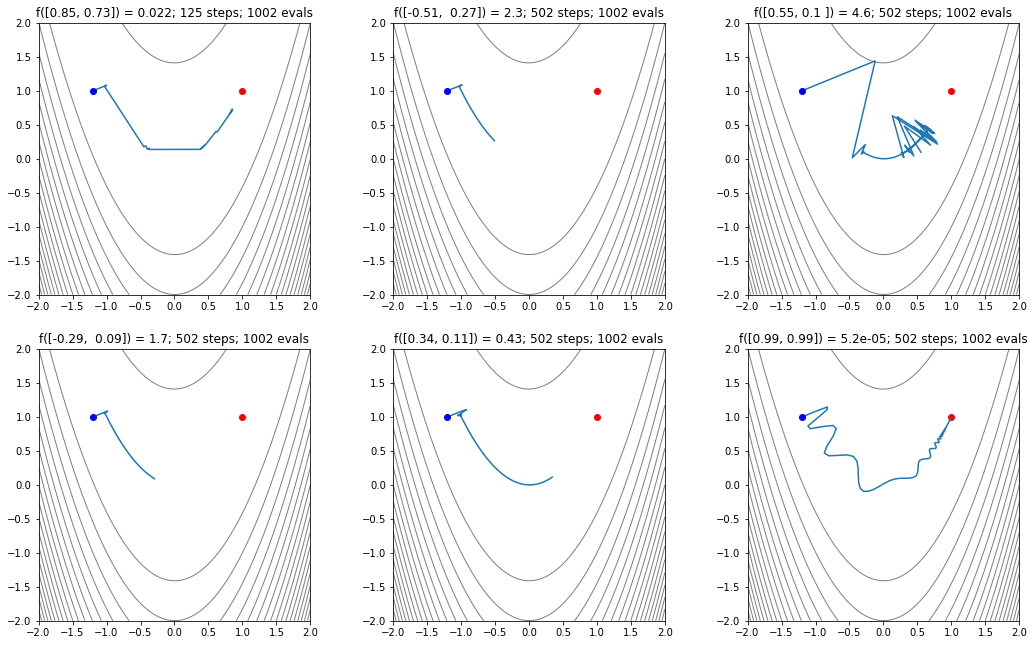

In [87]:
plt.figure(figsize=(18,11))
for i in range(6):
    plt.subplot(2,3, i + 1)
    z1, f1, evaluations, h = dataset[i]
    plot_history_path(
        h,
        banana,
        z_star,
        evaluations,
        None,
    )

### Problem 3.2 (Exam Style)

For each method, the "pros" and "cons" are described below:

- line search method: line search is perhaps the quickest way to find a small range around the minimum in terms of total steps required, but it is not effective at finding *the* minimum - as the true minimum is approached, travelling closer to the minimum becomes asymptotically impossible. As we saw in Question 1, however, line search becomes incredibly efficient if we know how the function behaves for any value in its domain, but knowing a function's behavior to the point that it is differentiable (especially in the case of machine learning problems) is typically not possible or at least not worth doing computationally speaking. Regardless, we see in the graphs in Question 3 that line search was the only other method to come close to our own trial-and-error observations (graph 6), and did so in only 125 steps (compared to the 500 needed in other methods). Notice the wide steps it can take around "flat" areas of the contour map, reducing computational expense at the start, compared to the tiny steps it begins to take at the very end of the path (drawn in blue - the several steps are evidenced by the "fuzziness" around the end of the path in graph 1).

- fixed step method: fixed step is both a naive and somewhat more advanced approach than line search. On the one hand, fixed step doesn't consider the path it has taken up to a given point in its "journey" to the minimum nor does it consider the path it will take - rather, it only considers the curvature of its path (gradient) towards the minimum at that moment alone, which it uses to weight the distance of its step. On the other, it is being educated by the gradient to change its "speed" to the minimum, unlike line search. Therefore, the path itself is not so much fixed as is the multiplier that is applied to the gradient at any point in the journey to the minimum. As evidenced by Question 3, a fixed step may seem to simplify the process of reaching some minimum, but in fact it may end up "constraining" the path to only certain lengths, keeping it from further approaching the minimum without overshooting (as in graph 3 above) or be so small that there are too many steps required to make significant progress (as with graph 2 above). Thus, the fixed step method doesn't seem to be particularly effective in the face of the momentum and line search methods. Thus, the single parameter $\alpha$ acts as a **constant** (hence *fixed step*) factor that limits the influence of the gradient on the speed of the path to the minimum.

- momentum method: The momentum method bases its theory off of physics of the natural world, namely the relationship between a mass's inertia and acceleration in affecting the ability of that mass to change velocity over time. This method is an extension of the fixed step method with additional parameters that are roughly analogous to time (in this problem set, $\alpha$ can represent a time step) and initial velocity (`v0`). Acceleration is given by the gradient - that is, the curve of the function towards the optimal minimum represents the magnitude of the acceleration. Finally, we incorporate a weighting factor $\mu$ to represent how much we want the past velocity to influence the current speed. The momentum method is clearly useful for covering "sloped" curves quickly, and covering "plateaus" in the function without wasting time as the fixed step method would (as the gradient would be close to zero, effectively halting the path). That being said, there are key limitations to the momentum method that are directly related to the parameters we choose to pass to the function. Firstly, an overenthusiastic value for $\mu$ threatens to allow the path to skip over a minimum, especially if that minimum is suddenly very steep (think of a canyon, rather than rolling hills). Conversely, an overly-conservative value for $\mu$ allows the method to inherit the problems of the fixed-step method, namely the danger of stagnation around plateaus in the function's contour. This is only further complicated as we consider changing the step size and initial velocity of the path, making the momentum method both the most versatile method of these three mentioned but also the most complex, requiring the user to either have prior knowledge about the function their are minimizing or allow for several trials to determine ideal parameters for the method.